In [87]:
using Plots, PlotRecipes, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [49]:
include("simple_ODE_solvers.jl")

cobweb_plot! (generic function with 1 method)

# Bifurcation Diagram

Write a program to construct a bifurcation diagram for the logistic map.  (Hint: this should be a loop that calls your logistic map program from Unit 1.3.)  Your program should take the following arguments:

In [92]:
f(x) = logistic_equation(0.9, 3)

f (generic function with 1 method)

In [93]:
ns, xn = logistic_iterator(.9, 3, 10)

11-element Array{Any,1}:
 0.9     
 0.27    
 0.5913  
 0.724993
 0.598135
 0.721109
 0.603333
 0.717967
 0.607471
 0.71535 
 0.610873

In [94]:
deleteat!(xn, 1:5)
rs = ones(length(xn))

scatter(rs, xn, markersize=0.2, c=:black, leg=false, grid=false)

LoadError: LoadError: MethodError: `deleteat!` has no method matching deleteat!(::Float64, ::UnitRange{Int64})
Closest candidates are:
  deleteat!{T<:Integer}(!Matched::Array{T,1}, ::UnitRange{T<:Integer})
  deleteat!(!Matched::Array{T,1}, ::Any)
  deleteat!(!Matched::BitArray{1}, ::UnitRange{Int64})
  ...
while loading In[94], in expression starting on line 1

In [91]:
"""
    bifurcation(x0, n, range_r, k)
    OUT: r_parameters, orbits

Constructs the array to plot the bifurcation plot of the logistic equation. `x0` is the initial condition, `n` is
the number of iterates for the `logistic_iterator`function, the `range_r` is the range of the r parameter of the 
logistic equation, k is the number of steps that we want to remove from the transient.

"""

function bifurcation(x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range_r
        
        solution = logistic_iterator(x0, r, n) 
        
        deleteat!(solution, 1:k) #Remove the transient.
        rs = similar(solution)
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        append!(orbit, solution)
        append!(r_par, rs)
        
    end
    
    return r_par, orbit
    
end

bifurcation (generic function with 1 method)

##### First try!

In [95]:
r_range, orb_1 = bifurcation(0.9, 40, 0.01:1/32:4, 10)

([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01  …  3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875],[8.99182e-22,8.99182e-24,8.99182e-26,8.99182e-28,8.99182e-30,8.99182e-32,8.99182e-34,8.99182e-36,8.99182e-38,8.99182e-40  …  0.837623,0.541152,0.98795,0.0473676,0.179537,0.586083,0.965204,0.133627,0.460624,0.988519])


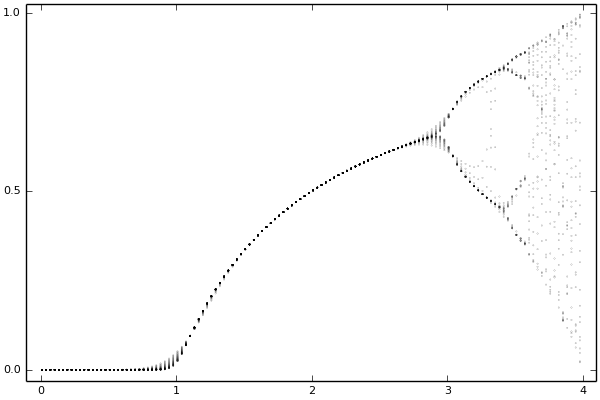

In [96]:
scatter(r_range,orb_1, markersize=0.1, c=:black, leg=false, grid=false)

#### Question 2
Check your program by constructing a bifurcation plot for $r\ \epsilon \ [2.4,4]$ with a step size of 0.01.  For each r, construct a 1000-iterate trajectory from x0 = 0.2, and discard the first five points -- i.e., plot x5 to x1000 for each r.  The overall structure will look similar to that of Figure 1 below (although not quite identical; we'll get to that later in this quiz).

![question1](https://www.complexityexplorer.org/ckeditor_assets/pictures/403/content_feigenbaum.png)


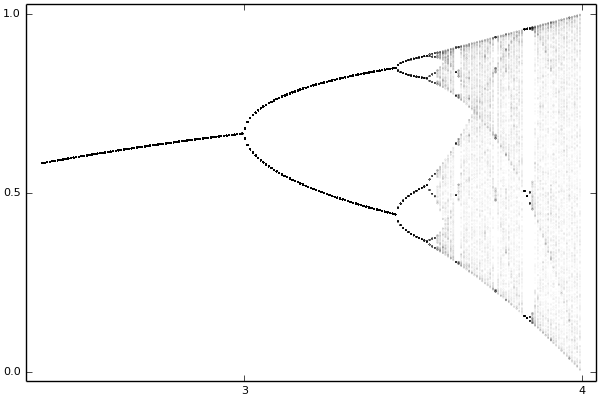

In [102]:
r_range, orb_1 = bifurcation(0.2, 1000, 2.4:1/128:4, 500)
scatter(r_range,orb_1, markersize=0.01, c=:black, leg=false, grid=false)

It looks fuzzier than the plot from the exercise.

----------------------------------------

#### Question 3
Using your tool, construct a bifurcation diagram with $r\ \in \ [2.8,3.6] $ with rstep = 0.01.  Start each orbit from x0 = 0.2 and plot x500 to x1000 for each r.


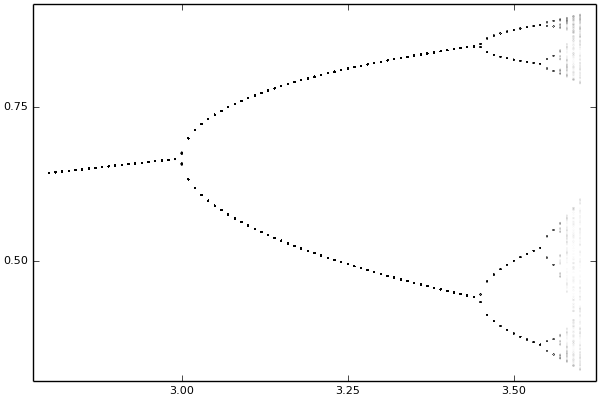

In [103]:
r_range, orb_1 = bifurcation(0.2, 1000, 2.8:0.01:3.6, 500)
scatter(r_range,orb_1, markersize=0.01, c=:black, leg=false, grid=false)